In [1]:
#import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the data
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
#EDA and visualization
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#drop 'RowNumber', 'CustomerId', 'Surname' as they are irrelevant to churn outcome

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 'columns', inplace=True)
df.dtypes 

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [13]:
df.shape

(10000, 11)

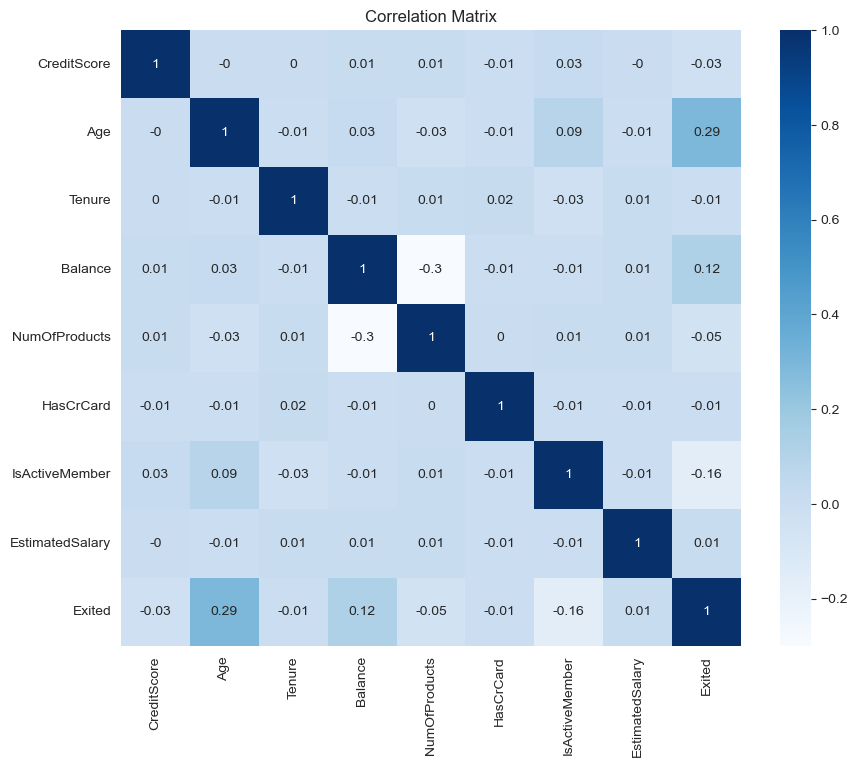

In [14]:

corr = df.corr(numeric_only = True).round(2)

plt.figure(figsize= (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot= True, cmap = 'Blues', cbar= True)
plt.show()

<Axes: >

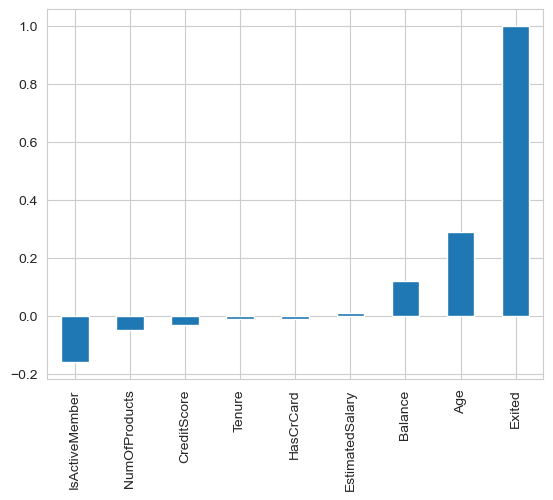

In [15]:
corr['Exited'].sort_values().plot(kind='bar')

In [16]:
corr['Exited'].sort_values(ascending = True)

IsActiveMember    -0.16
NumOfProducts     -0.05
CreditScore       -0.03
Tenure            -0.01
HasCrCard         -0.01
EstimatedSalary    0.01
Balance            0.12
Age                0.29
Exited             1.00
Name: Exited, dtype: float64

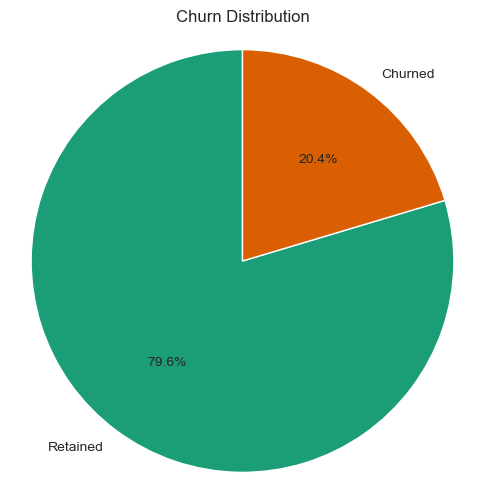

In [17]:
#Exited's overall distribution.
labels = ['Retained', 'Churned']
plt.figure(figsize = (6,6))
plt.pie(x = df['Exited'].value_counts(), labels= labels, colors=plt.cm.Dark2.colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show() 

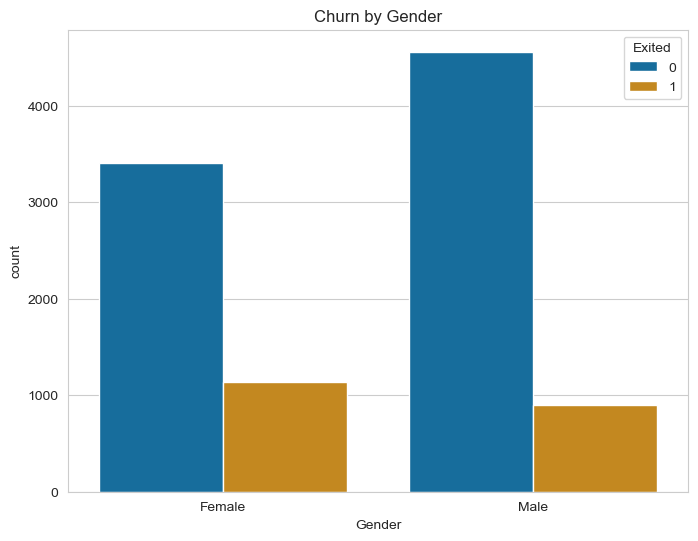

In [18]:
#Which gender is most likley to churn?
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Gender', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Gender')
plt.show()


In [19]:
#churn rate by gender

churn_rate_gender = df.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64


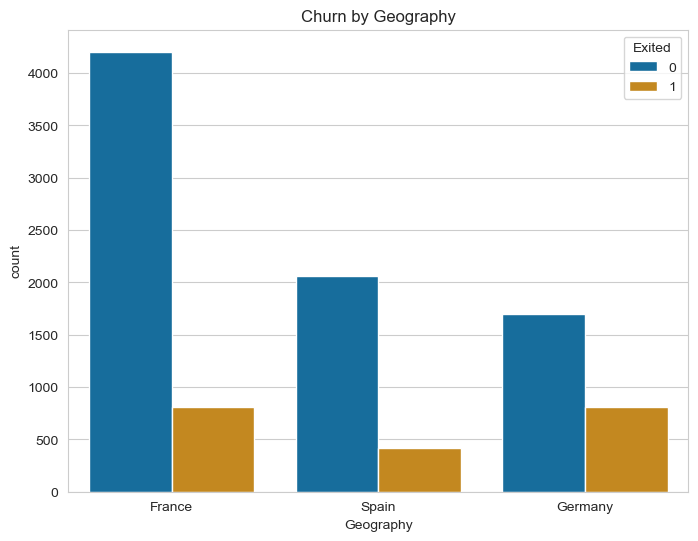

In [20]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Geography', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Geography')
plt.show() 

In [21]:
churn_rate_geography = df.groupby('Geography')['Exited'].mean()*100
print(churn_rate_geography)

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


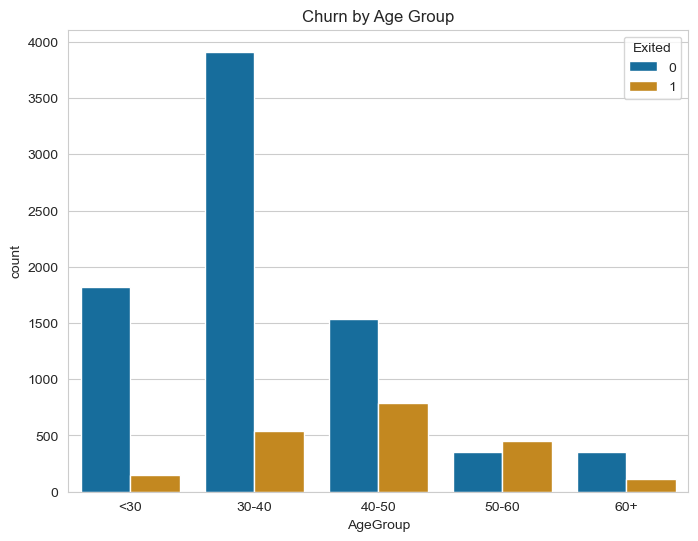

In [22]:
#Create a new column called AgeGroup which puts different ages into age buckets.
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf],
                        labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
plt.title('Churn by Age Group')
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette= 'colorblind')
plt.show() 

In [23]:
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-40    12.087171
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


In [24]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'AgeGroup'],
      dtype='object')

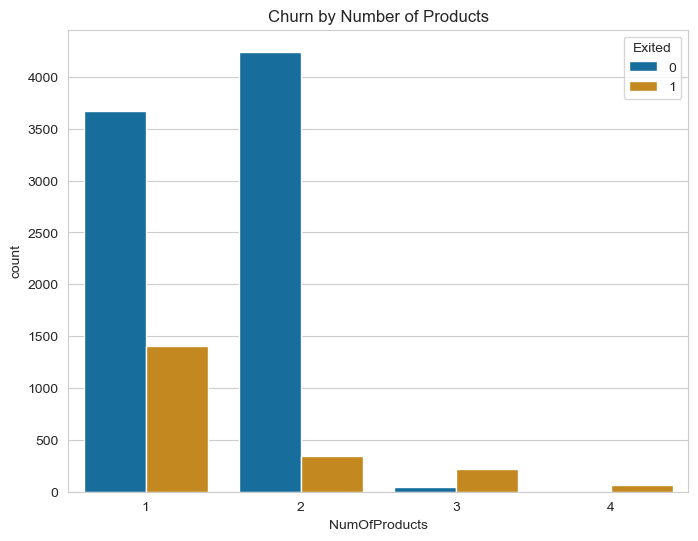

In [25]:
#We see a negative correlation between them, so most likely, as number of products go up,churn rate should decrease.
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'NumOfProducts', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Number of Products')
plt.show() 

In [26]:
churn_rate_products = df.groupby('NumOfProducts')['Exited'].mean()*100
print(churn_rate_products)

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64


customers with more than two products are most likely to leave

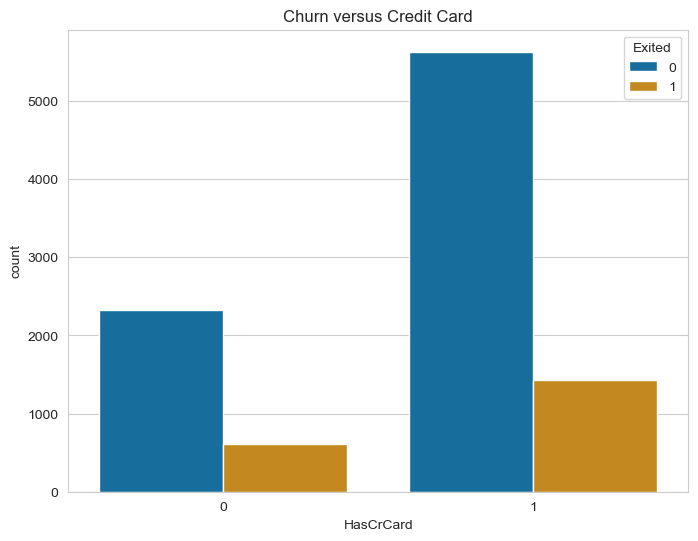

In [27]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'HasCrCard', hue = 'Exited', palette = 'colorblind')
plt.title('Churn versus Credit Card')
plt.show() 

In [28]:
churn_rate_card = df.groupby('HasCrCard')['Exited'].mean()*100
print(churn_rate_card)

HasCrCard
0    20.814941
1    20.184266
Name: Exited, dtype: float64


Customers with credit cards are slightly less likely to exit

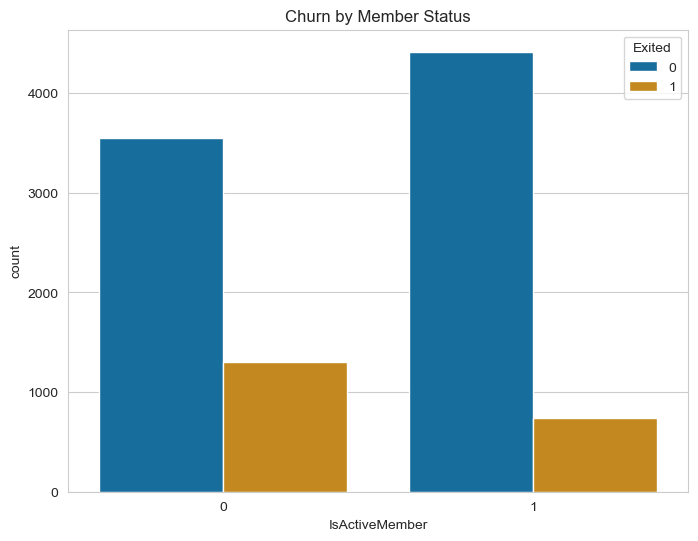

In [29]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Status')
plt.show() 

In [30]:
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64


As expected, non-active customers are exiting more

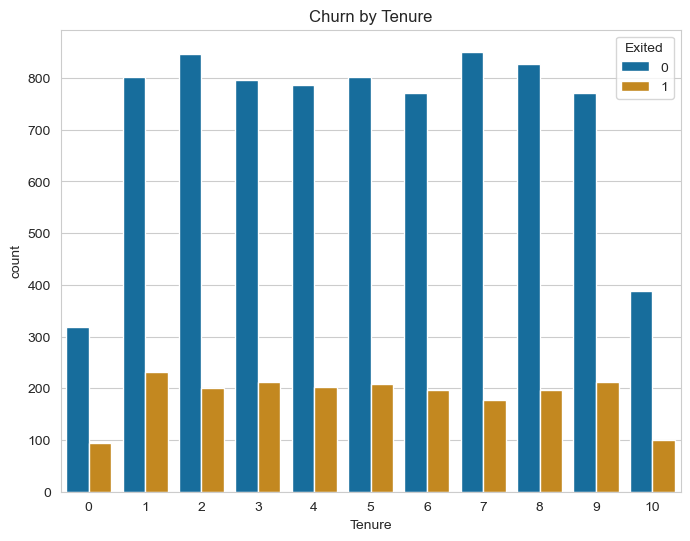

In [31]:
plt.figure(figsize = (8,6))
plt.title('Churn by Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'colorblind', data = df)
plt.show()


In [32]:
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean()*100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.646341
10    20.612245
Name: Exited, dtype: float64


The average churn rate is around 20% across tenures but customers with ten years are slightly less likely to exit the bank.

In [33]:
df.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
AgeGroup           category
dtype: object

In [34]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
2879,750,Germany,Female,52,6,107467.56,1,1,0,126233.18,1,50-60
9323,644,France,Male,50,9,76817.00,4,1,0,196371.13,1,40-50
4604,681,France,Male,25,5,0.00,1,0,1,90860.97,0,<30
8478,639,France,Male,66,0,0.00,2,0,1,42240.54,0,60+
3276,794,Germany,Female,54,1,75900.84,1,1,1,192154.66,0,50-60


In [36]:
#create dummies for categorical variables

df1 = pd.get_dummies(df, columns= ['Geography','Gender'],
                         dtype = int) 

In [37]:
df1.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3580,639,41,5,98635.77,1,1,0,199970.74,0,40-50,0,1,0,1,0
2443,560,57,0,0.00,2,0,1,116781.71,0,50-60,1,0,0,0,1
1779,703,36,2,0.00,2,1,0,108790.95,0,30-40,1,0,0,0,1
7878,731,38,10,123711.73,2,1,0,171340.68,1,30-40,1,0,0,1,0
771,717,31,4,129722.57,1,0,0,41176.60,0,30-40,1,0,0,0,1


In [38]:
df1.shape

(10000, 15)

Train Test Split
Let's split the data in the 80-20 ratio where 80% of the data will be used to train the model. First, we create X and y.

In [40]:
#drop agegroup

df2 = df1.drop(['AgeGroup'], axis = 1)

In [153]:
df2.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
7151,442,34,4,0.00,2,1,0,68343.08,0,5,529,1,0,0,0,1,1,0,0,0
1948,680,35,9,0.00,2,0,0,143774.06,0,5,590,0,0,1,0,1,0,0,1,0
3601,608,50,6,0.00,1,1,0,93568.77,1,4,343,1,0,0,0,1,0,0,0,1
8421,693,43,6,128760.32,1,1,0,36342.79,0,2,488,1,0,0,0,1,0,0,1,0
7740,665,51,8,0.00,1,1,1,38928.48,1,2,317,0,0,1,1,0,1,0,0,0


In [41]:
df2.shape

(10000, 14)

In [42]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:

scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [46]:

logreg_model = LogisticRegression()

In [47]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
predictions = logreg_model.predict(X_test)
predictions 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
X_test

array([[0.492     , 0.18918919, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.546     , 0.33783784, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.502     , 0.35135135, 0.4       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.76      , 0.39189189, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.684     , 0.14864865, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.556     , 0.28378378, 0.1       , ..., 0.        , 0.        ,
        1.        ]])

In [50]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [51]:
print('Accuracy Score:')

accuracy_score(y_test, predictions)

Accuracy Score:


0.812

In [52]:
print("Classification Report")

print('\n')

print(classification_report(y_test, predictions))

Classification Report


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [53]:
#provides insight into  true positives ,false positives ,true negatives,false negatives
print('Confusion Matrix')

print('\n')

print(confusion_matrix(y_test, predictions))

Confusion Matrix


[[1549   58]
 [ 318   75]]


In [54]:
#true negatives+true positives/true negatives+true positives+false negatives+false positives
print('Accuracy of Model :')

(1547+77)/(1547+77+316+60)

Accuracy of Model :


0.812

In [55]:
#true positives/true positives+false positives
print('Precision of Model:')

1547/(1547+316)

Precision of Model:


0.8303811057434246

In [56]:
#recall true positivie rate
#true positives/true positives+false negatives
print('Recall Score of the Model:')

1547/(1547+60)

Recall Score of the Model:


0.9626633478531424

In [57]:
#f1 score harmonic mean of precision and recall
precision = 83
recall = 96

f1_score = 2*(precision*recall)/(precision+recall)

In [58]:
print('F1 Score of the Model:')

print(f1_score)

F1 Score of the Model:
89.02793296089385
